### Task 6
How many states cover 50% of US air traffic?

***Strategy***
- determine which airports correspond to which states
    - determine if majority of flights are intra or inter state
- determine the frequency of flights through each state
- sort high to low
- graph cumulative percentage of the flights and find where we cross the 50% 

---
**INPUT**: flight data with nulls removed

---

In [32]:
#import packages
import pandas as pd
import numpy as np
import seaborn as sns
import datetime

In [56]:
df = pd.read_csv("flight_sample_small.csv")

In [93]:
df = pd.read_csv("flight_sample_large.csv")

In [4]:
df.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled',
       'cancellation_code', 'diverted', 'dup', 'crs_elapsed_time',
       'actual_elapsed_time', 'air_time', 'flights', 'distance',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay', 'first_dep_time', 'total_add_gtime',
       'longest_add_gtime'],
      dtype='object')

In [94]:
df = df[['origin_city_name','dest_city_name', 'fl_date']]

We are able to determine state from the origin_city_name and dest_city_name
<br>We are also able to group the flights by month

In [12]:
def get_state(city):
    """Takes in a string representing the city name and returns the state
    INPUT city (string format CITY, SS)
    RETURN SS"""
    
    info = city.split(",")
    return info[1][1:]

In [20]:
def type_of_flight(origin, dest):
    """Determine whether a flight is "inter" or "intra" state
    INPUT orgin and destination state as 2 letter abbreviation
    RETURNS
        0 where travel is intrastate (same origin and destination state)
        1 where travel is interstate"""
    if origin == dest:
        return 0
    return 1

In [29]:
def get_month(date):
    """Returns the month the flight occurs
    INPUT date in form YYYY-MM-DD
    RETURNS month"""
    DATE = datetime.datetime.strptime(date, "%Y-%m-%d")
    return DATE.month

In [95]:
df["origin_state"] = df["origin_city_name"].map(get_state)
df["dest_state"] = df["dest_city_name"].map(get_state)
df["interstate"] = df.apply(lambda x: type_of_flight(x.origin_state, x.dest_state), axis=1)

We will work on both orgin and destination cities <br> our expection is that states have equal numbers of departures as arrivals

In [96]:
df_origin = df[["fl_date","origin_state", "interstate"]]
df_dest = df[["fl_date","dest_state", "interstate"]]

In [97]:
print("The percent of travel flights that have different origin and destination states is: ",
      round(df.interstate.sum()/len(df)*100,2))

The percent of travel flights that have different origin and destination states is:  89.09


*Working with Origin State*

In [98]:
df_origin_grouped = df_origin.groupby("origin_state", as_index=False)["fl_date"].count()
df_origin =  df_origin.groupby("origin_state", as_index=False)["interstate"].sum()
df_origin = df_origin.merge(df_origin_grouped, on = "origin_state", how = 'outer')

In [99]:
df_origin.rename(columns = {"interstate":"total_interstate_flights", "fl_date":"total_flights" }, inplace = True)

In [100]:
df_origin = df_origin.sort_values(by="total_flights", ascending=False)

In [101]:
df_origin['cumsum_flights'] = df_origin['total_flights'].cumsum()

In [102]:
df_origin['cumpercent_flights'] = 100*df_origin['cumsum_flights']/df_origin['total_flights'].sum()

In [103]:
df_origin.head(10)

,origin_state,total_interstate_flights,total_flights,cumsum_flights,cumpercent_flights
4,CA,371243,545627,545627,10.91254
44,TX,366921,493800,1039427,20.78854
8,FL,338223,360717,1400144,28.00288
13,IL,305311,317194,1717338,34.34676
9,GA,250931,264201,1981539,39.63078
33,NY,245913,260442,2241981,44.83962
26,NC,206666,231601,2473582,49.47164
5,CO,178733,195721,2669303,53.38606
37,PA,138431,149236,2818539,56.37078
7,DC,148718,148718,2967257,59.34514


In [104]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

Text(0.5, 1.0, 'Cumulative Percentage of Flights by State')

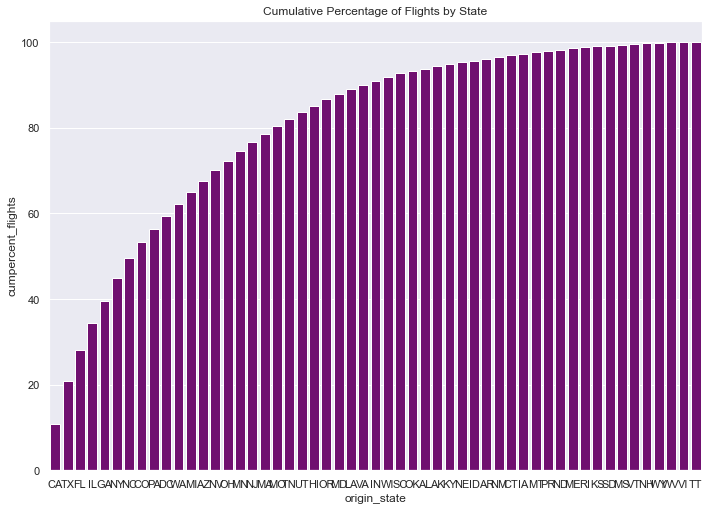

In [105]:
sns.barplot(x="origin_state", y="cumpercent_flights", data=df_origin , color='purple').set_title("Cumulative Percentage of Flights by State")

Text(0.5, 1.0, 'Breakdown of Air Traffic by State')

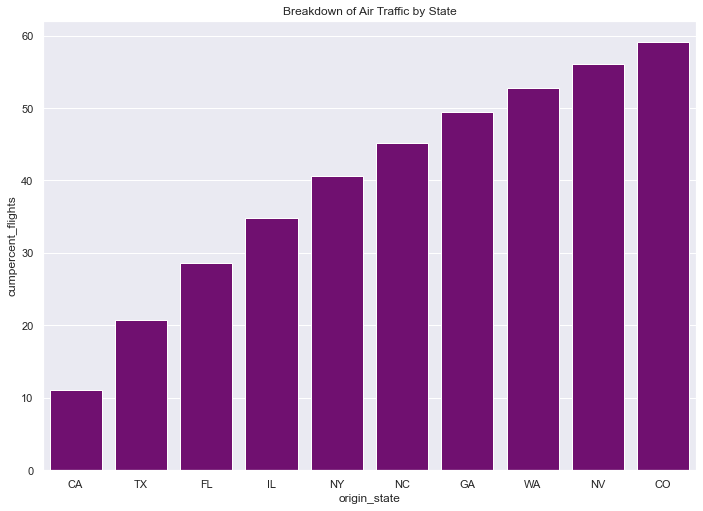

In [81]:
sns.barplot(x="origin_state", y="cumpercent_flights", data=df_origin.head(10) , color='purple').set_title("Breakdown of Air Traffic by State")

*Working with Destination State*

In [106]:
df_dest_grouped = df_dest.groupby("dest_state", as_index=False)["fl_date"].count()
df_dest =  df_dest.groupby("dest_state", as_index=False)["interstate"].sum()
df_dest = df_dest.merge(df_dest_grouped, on = "dest_state", how = 'outer')

In [107]:
df_dest.rename(columns = {"interstate":"total_interstate_flights", "fl_date":"total_flights" }, inplace = True)

In [108]:
df_dest = df_dest.sort_values(by="total_flights", ascending=False)

In [109]:
df_dest['cumsum_flights'] = df_dest['total_flights'].cumsum()
df_dest['cumpercent_flights'] = 100*df_dest['cumsum_flights']/df_dest['total_flights'].sum()

Text(0.5, 1.0, 'Cumulative Percentage of Flights Traffic by State')

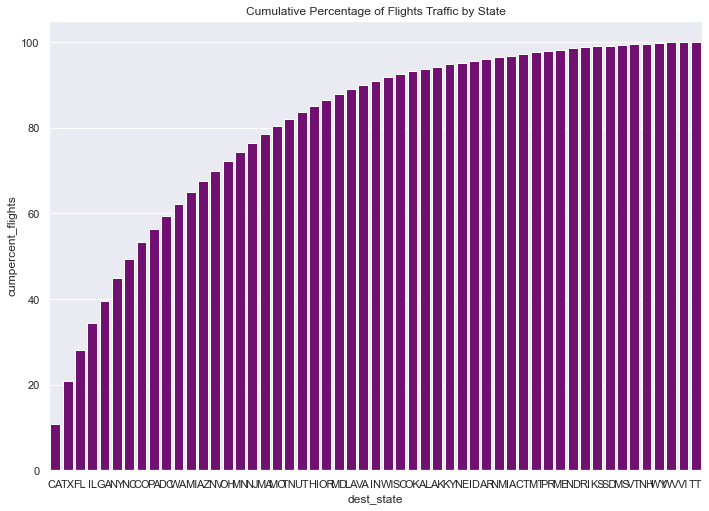

In [110]:
sns.barplot(x="dest_state", y="cumpercent_flights", data=df_dest , color='purple').set_title("Cumulative Percentage of Flights Traffic by State")

Text(0.5, 1.0, 'Breakdown of Air Traffic by State')

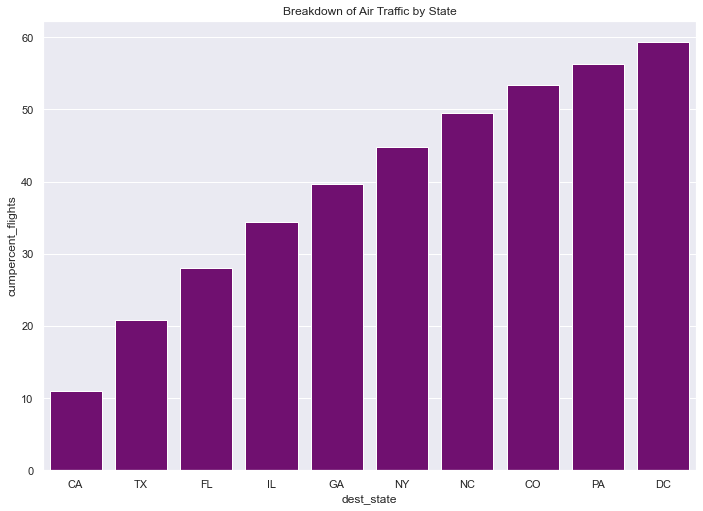

In [112]:
sns.barplot(x="dest_state", y="cumpercent_flights", data=df_dest.head(10) , color='purple').set_title("Breakdown of Air Traffic by State")

>From these we can see that the market share is very similar for origin and destination airport which lines up with what we were expecting

*Interstate Travel* <br>
Are the states with the highest portion of the interstate travel the same as the airports with the same air traffic or do they simply have more airports internally
- working with the origin information

In [113]:
df_origin['cumpercent_interstate_flights'] = df_origin['total_interstate_flights'].cumsum()/df_origin['total_interstate_flights'].sum()

Text(0.5, 1.0, 'Cumulative Percentage of Interstate Flights by State')

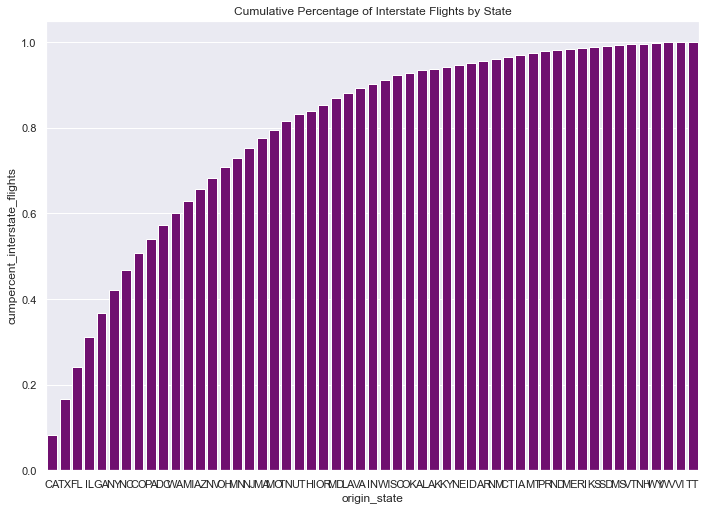

In [114]:
sns.barplot(x="origin_state", 
            y="cumpercent_interstate_flights", 
            data=df_origin , 
            color='purple').set_title("Cumulative Percentage of Interstate Flights by State")

Text(0.5, 1.0, 'Cumulative Percentage of Interstate Flights by State')

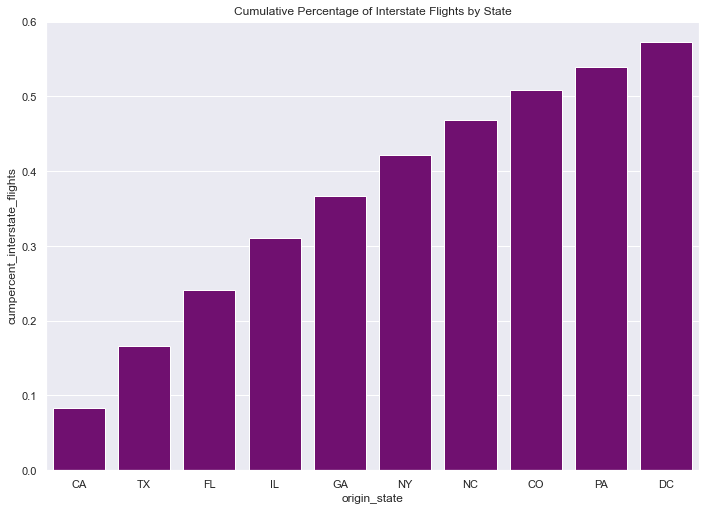

In [116]:
sns.barplot(x="origin_state", 
            y="cumpercent_interstate_flights", 
            data=df_origin.head(10) , 
            color='purple').set_title("Cumulative Percentage of Interstate Flights by State")

In [118]:
df.to_csv("tasksix.csv", index=False)